In [1]:
import talib

import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## DEFINING INDICATORS
This is a list of indicators provided by TA-Lib to develop your trading strategies.

Indicators [EMA(10 and 20), CCI(20),  MACD(12, 26, 9)]


# TRADING STRATEGY
In this trading strategy, we define entry and exit conditions based on the selected indicators. The conditions are as follows:

### Buy signal 

 - Entry Condition:
       - Condition 1: Check if 10-period EMA crosses above 20-period EMA.
       - Condition 2: Check if CCI crosses the +100 line.
       - Condition 3: Check if the MACD line crosses above the zero line.

 - Exit Condition:
       - Condition 1: Check if CCI crosses the -100 line.

### Sell signal 

 - Entry Condition:
       - Condition 1: Check if 10-period EMA crosses below 20-period EMA.
       - Condition 2: Check if CCI crosses the -100 line.
       - Condition 3: Check if the MACD line crosses below the zero line.

 - Exit Condition:
       - Condition 1: Check if CCI crosses the +100 line.


    
    
### Generating Signals:

   - A DataFrame named signals is created to store the buy/sell signals.
   - The 'positions' column is initialized with zeros (no position).
   - The entry_condition is used to set the 'positions' value to 1 (buy signal) where the conditions are met.
   - The exit_condition is used to set the 'positions' value to -1 (sell signal) where the condition is met.

In [2]:
# Define your trading strategy
def strategy(data):
    # Define the entry and exit conditions for buy signal
    condition1_buy = data['EMA_10'] > data['EMA_20']
    
    entry_condition_buy = condition1_buy 
    exit_condition_buy = data['EMA_10'] < data['EMA_20']

    # Define the entry and exit conditions for sell signal
    condition1_sell = data['EMA_10'] < data['EMA_20']
    
    entry_condition_sell = condition1_sell 
    exit_condition_sell = data['EMA_10'] > data['EMA_20']

    # Generate the signals
    signals = pd.DataFrame(index=data.index)
    signals['positions'] = 0
    signals.loc[entry_condition_buy, 'positions'] = 1
    signals.loc[exit_condition_buy, 'positions'] = -1
    signals.loc[entry_condition_sell, 'positions'] = -1
    signals.loc[exit_condition_sell, 'positions'] = 1

    return signals


## HISTORICAL DATA
Next, we download historical stock data for the specified symbol (in this case, 'AAPL' for Apple Inc.) from the start date to the end date using the yfinance library.

In [3]:
symbol = 'SPY'
start_date = '2020-01-01'
end_date = '2023-01-01'

data = yf.download(symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,307.375702,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,305.048157,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,306.211945,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,305.350952,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,306.978333,68296000


## CALCULATING INDICATORS


In [5]:
# Calculate the indicators

data['EMA_10'] = talib.EMA(data['Close'], timeperiod=10)
data['EMA_20'] = talib.EMA(data['Close'], timeperiod=20)


In [6]:
data.sample(5)

,Open,High,Low,Close,Adj Close,Volume,EMA_10,EMA_20
Date,,,,,,,,
2022-03-04,431.750000,433.369995,427.880005,432.170013,422.085968,113978200,434.906892,438.336627
2022-10-24,375.890015,380.059998,373.109985,378.869995,374.313904,85436900,369.548889,370.648072
2021-03-30,394.420013,395.450012,393.019989,394.730011,381.694275,76262200,392.676267,391.116139
2022-09-02,400.279999,401.559998,390.329987,392.239990,385.937744,99632100,403.381744,407.288569
2022-03-23,446.910004,448.489990,443.709991,443.799988,434.791077,79426100,438.460747,436.205719


## STRATEGY AND BACKTESTING
This section applies the trading strategy to the data and backtests it. It generates buy/sell signals based on the strategy's entry and exit conditions. Then, it calculates the portfolio by taking the difference of positions (signals_1['positions'].diff()) and initializes the first position. It also calculates the returns, strategy returns (returns multiplied by portfolio), and cumulative returns. Finally, it prints the cumulative returns and plots them.

In [7]:
signals_1 = strategy(data) 

In [8]:
signals_1[(signals_1['positions'] == 1) ] #(signals_1['positions']==-1)]

,positions
Date,
2020-01-30,1
2020-02-05,1
2020-02-06,1
2020-02-07,1
2020-02-10,1
...,...
2022-12-09,1
2022-12-12,1
2022-12-13,1


## SIGNAL RETURNS  BUY POSITIONS ONLY?

In [9]:
portfolio = signals_1['positions'].diff()

portfolio.iloc[0] = signals_1['positions'].iloc[0]

data['portfolio'] = portfolio

data['returns'] = data['Close'].pct_change()
data['strategy_returns'] = data['returns']*data['portfolio']

data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()
data['cumulative_returns'] = (1 + data['returns']).cumprod()


Text(0, 0.5, 'Cumulative Returns')

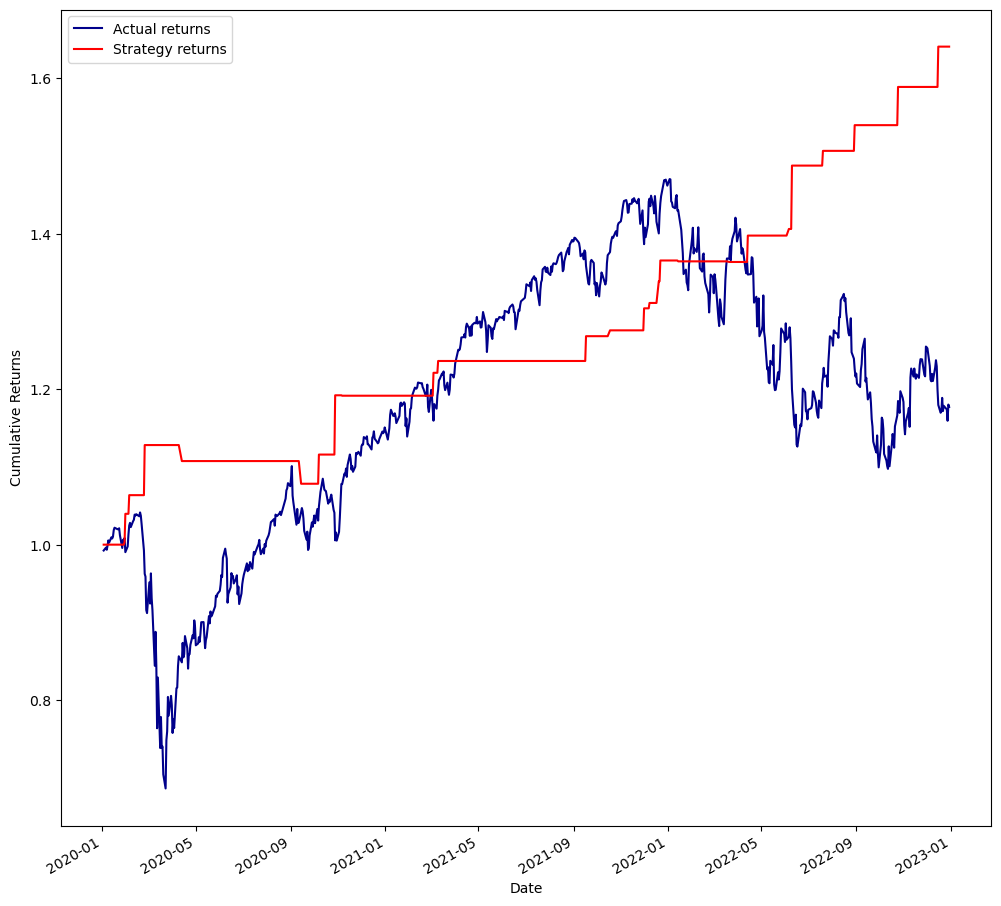

In [10]:
plt.figure(figsize=(12,12))
data['cumulative_returns'].plot(label = 'Actual returns', color='darkblue')
data['cumulative_strategy_returns'].plot(label = 'Strategy returns', color='red')
plt.legend()
plt.ylabel('Cumulative Returns')

In [17]:
standard_dev= (data['Close'].std())
returns = data['cumulative_returns'] 


print(standard_dev)
print(returns)

54.922197078909775
Date
2020-01-02         NaN
2020-01-03    0.992428
2020-01-06    0.996214
2020-01-07    0.993413
2020-01-08    0.998707
                ...   
2022-12-23    1.178656
2022-12-27    1.174008
2022-12-28    1.159418
2022-12-29    1.180288
2022-12-30    1.177179
Name: cumulative_returns, Length: 756, dtype: float64


In [18]:
standard_dev_strat= (data['Close'].std())
returns_strat = data['cumulative_strategy_returns'] #data['strategy_returns'] #1.2 - 1.0/1.0

print(standard_dev_strat)
print(returns_strat)

54.922197078909775
Date
2020-01-02         NaN
2020-01-03    1.000000
2020-01-06    1.000000
2020-01-07    1.000000
2020-01-08    1.000000
                ...   
2022-12-23    1.640879
2022-12-27    1.640879
2022-12-28    1.640879
2022-12-29    1.640879
2022-12-30    1.640879
Name: cumulative_strategy_returns, Length: 756, dtype: float64


In [19]:
sharpe_original = returns/standard_dev

print(sharpe_original)

Date
2020-01-02         NaN
2020-01-03    0.018070
2020-01-06    0.018139
2020-01-07    0.018088
2020-01-08    0.018184
                ...   
2022-12-23    0.021460
2022-12-27    0.021376
2022-12-28    0.021110
2022-12-29    0.021490
2022-12-30    0.021434
Name: cumulative_returns, Length: 756, dtype: float64


In [20]:
sharpe_strat = returns_strat/standard_dev_strat

print(sharpe_strat)

Date
2020-01-02         NaN
2020-01-03    0.018208
2020-01-06    0.018208
2020-01-07    0.018208
2020-01-08    0.018208
                ...   
2022-12-23    0.029876
2022-12-27    0.029876
2022-12-28    0.029876
2022-12-29    0.029876
2022-12-30    0.029876
Name: cumulative_strategy_returns, Length: 756, dtype: float64


Text(0, 0.5, 'Sharpe ratio]')

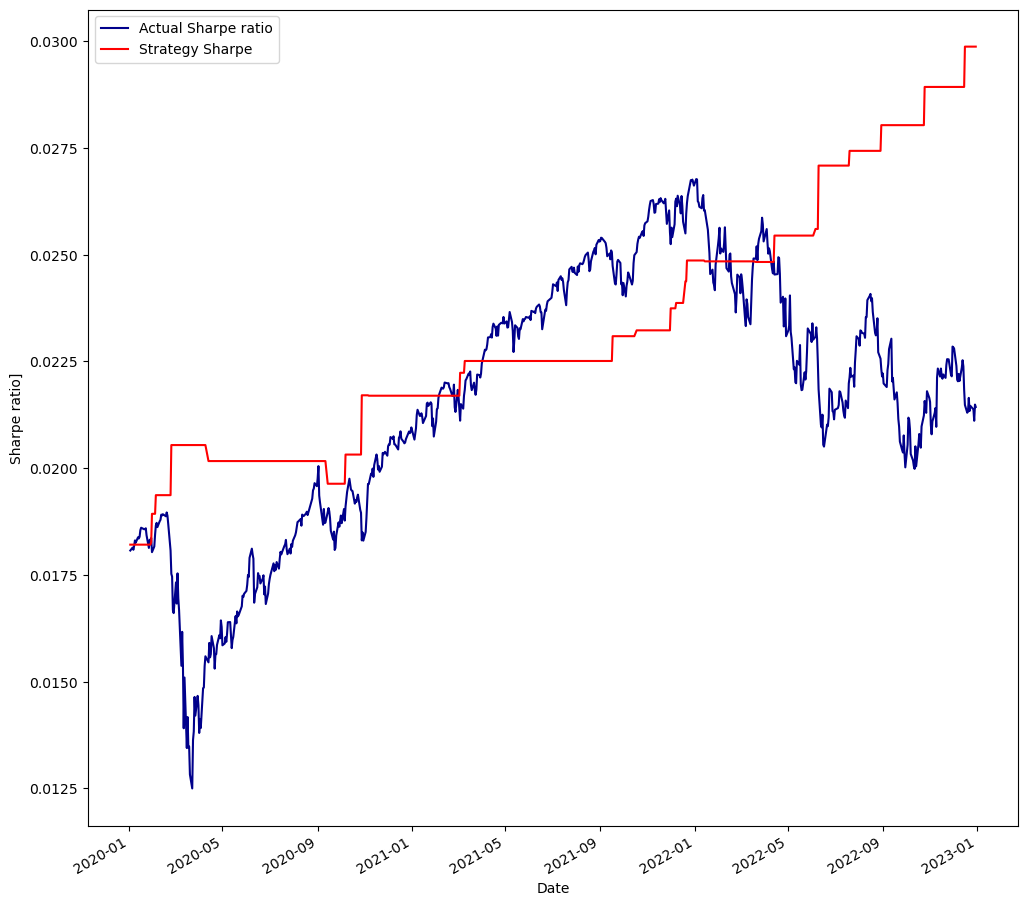

In [21]:
plt.figure(figsize=(12,12))
sharpe_original.plot(label = 'Actual Sharpe ratio', color='darkblue')
sharpe_strat.plot(label = 'Strategy Sharpe', color='red')
plt.legend()
plt.ylabel('Sharpe ratio]')